In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
#Extract the petal length and petal width features from the dataset
X = iris.data[:, [2,3]]
y = iris.target
print('Class Labels: ', np.unique(y))
# Iris-setosa : 0 , Iris-versicolor : 1, Iris-virginica: 2

Class Labels:  [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1, stratify=y)

In [4]:
print('Labels counts in y: ', np.bincount(y))


Labels counts in y:  [50 50 50]


In [5]:
print('Labels counts in y_train', np.bincount(y_train))

Labels counts in y_train [35 35 35]


In [6]:
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y_test [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
print(X_train_std[:5])

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]]


In [10]:
print(X_test_std[:5])

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]]


In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test !=y_pred).sum())

Misclassified examples: 1


In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [14]:
print('Accuracy : %.3f' % ppn.score(X_test_std, y_test))

Accuracy : 0.978


In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.01):
  #setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min , x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolor = 'black')
  #highlight test examples
  if test_idx:
    #plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                c = 'none', edgecolor='black', alpha = 1.0,
                linewidth=1, marker = 'o', s = 100, label='Test set')


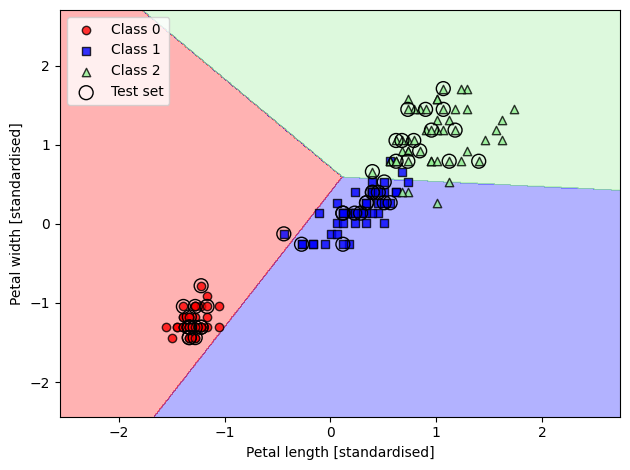

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train , y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx = range(105, 150))
plt.xlabel('Petal length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
 |      Only used if 

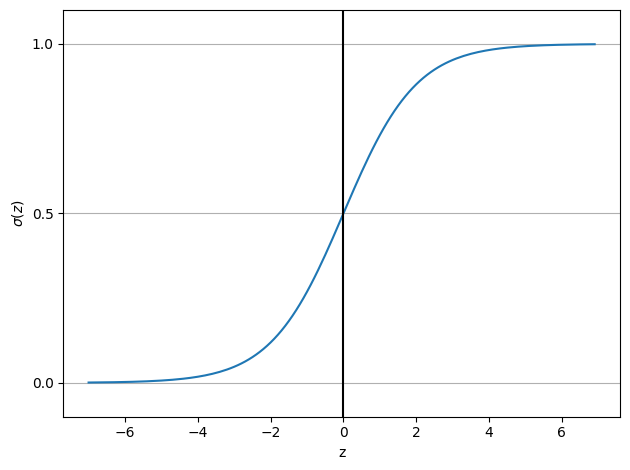

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

#y axis ticketes and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

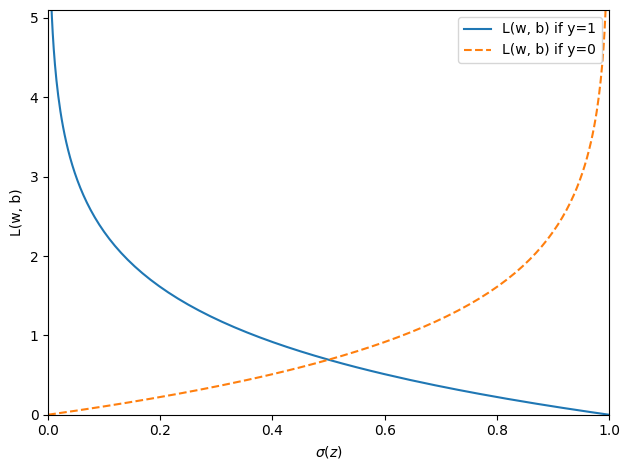

In [19]:
def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Converting Adaline implementation into algorithm for **Logistic Regression**

In [20]:
class LogisticRegressionGD:
  """
  Gradient descent-based logistic regression classifier.

  Parameters:
  -----------------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.
  random_state : int
    Random number generator seed for random weight initialisation and reproducibility.

  Attributes:
  ------------------
  w_ : 1d-array
    Weights after training
  b_ : Scalar
    Bias unit after fitting
  losses : list
    Mean squared error loss function values in each epoch.
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit the training data.

    Parameters:
    -----------------------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features -> number of features
    y : {array-like}, shape = [n_examples]
      Target values / class labels

    Returns:
    self : instance of LogisticRegressionGD
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output))) - ((1-y).dot(np.log(1 - output))) / X.shape[0]
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    """
    calculate the net input.
    """
    return np.dot(X, self.w_) + self.b_

  def activation(self, z):
    """
    Compute the logistic sigmoid activation
    """
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    """
    Return class label after unit step
    """
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

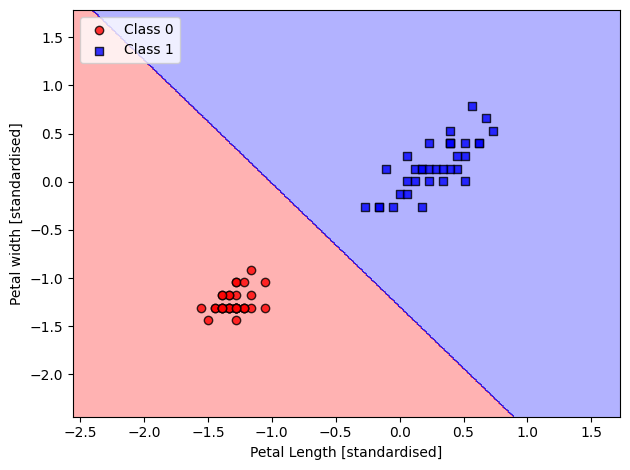

In [21]:
X_train_01_subset = X_train_std[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.3, n_iter = 1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal Length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# sklearn's LogisticRegression class

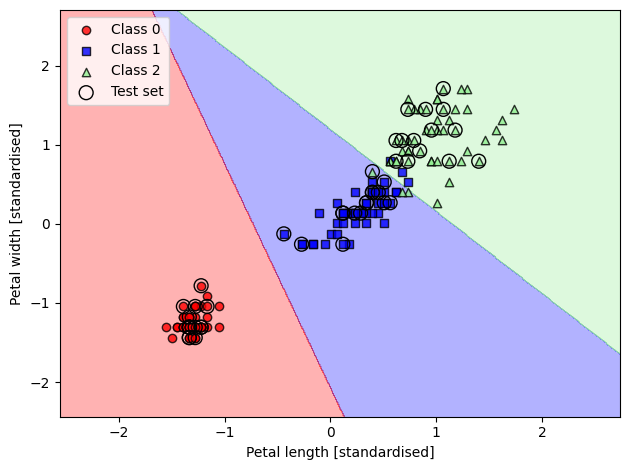

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [28]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [30]:
lr.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1])

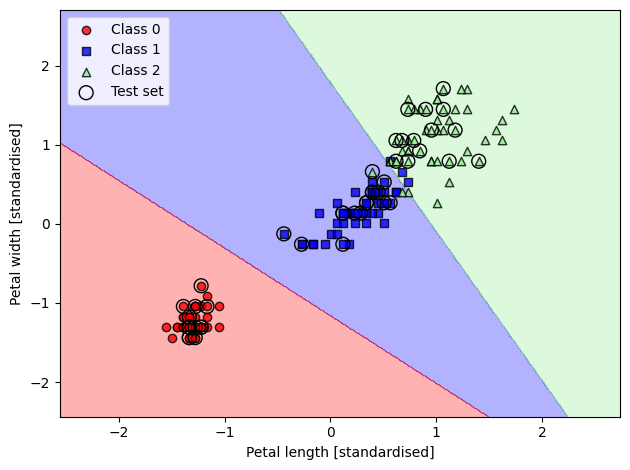

In [24]:
lr_multinomial = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
lr_multinomial.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr_multinomial, test_idx=range(105, 150))
plt.xlabel('Petal length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# L2 regularisation test

[]

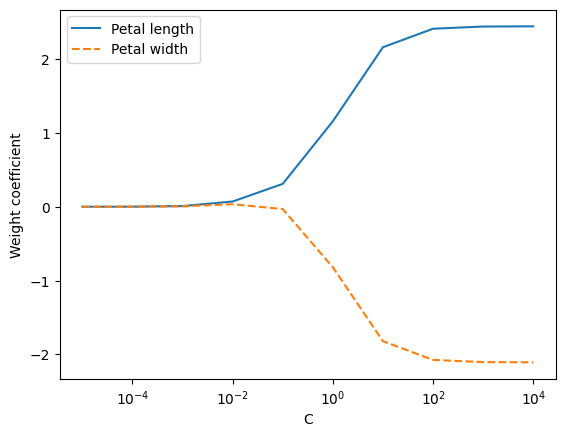

In [36]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.plot()